In [1]:
#Importing the necessary libraries
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sklearn

In [2]:
# Calculating Cumulative Count Cut
def scaleCCC(x):
  return((x - np.nanpercentile(x, 2))/(np.nanpercentile(x, 98) - np.nanpercentile(x,2)))

def applyCCC(img):
  # Extracting individual bands(4,8,12) from the uploaded images
  band4 = img.GetRasterBand(1).ReadAsArray()
  band8 = img.GetRasterBand(2).ReadAsArray()
  band12 = img.GetRasterBand(3).ReadAsArray()
  ccc4 = scaleCCC(band4)
  ccc8 = scaleCCC(band8)
  ccc12 = scaleCCC(band12)
  # Creating a new image by combining the three bands
  return(np.dstack((ccc4,ccc8,ccc12)))

In [3]:
# Reshaping the images
def reshape_images():
  reshaped_images=[]
  for i in range(len(images)):
    new_shape = (images[i].shape[0] * images[i].shape[1], images[i].shape[2])
    new_image = images[i][:, :, :3].reshape(new_shape)
    reshaped_images.append(new_image)

  #concatenating all the arrays
  combined_image = reshaped_images[0]
  for i in range(1, len(reshaped_images)):
    combined_image = np.concatenate((combined_image, reshaped_images[i]), axis=0)

  # Removing nan values
  train_image = np.nan_to_num(combined_image)
  return train_image

In [4]:
# Plot Function
def plot_image(plt_img):
  plt.figure()
  plt.imshow(plt_img)
  plt.show()

In [6]:
#Running the KMeans Algorithm
kmeans_model = KMeans(n_clusters=3)
#List of images
images_list = ["2_P.tif","2_A.tif","3_P.tif","3_A.tif","4_P.tif","4_A.tif","5_P.tif","5_A.tif","6_P.tif","6_A.tif","7_P.tif","7_A.tif","8_P.tif","8_A.tif","9_P.tif","9_A.tif","10_P.tif","10_A.tif","11_P.tif","11_A.tif","12_P.tif","12_A.tif","13_P.tif","13_A.tif", "14_P.tif", "14_A.tif", "15_P.tif", "15_A.tif"]
# images_list = ["2_P.tif","2_A.tif","3_P.tif","3_A.tif"]
images = []

# Opening the satellite images
for img_name in images_list:
    img = gdal.Open('./ALL_FLOOD/'+ img_name)
    modified_img = applyCCC(img)
    images.append(modified_img)

train_image = reshape_images()
kmeans_model = kmeans_model.fit(train_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


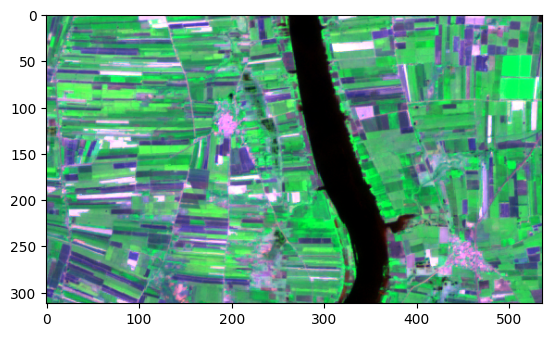

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


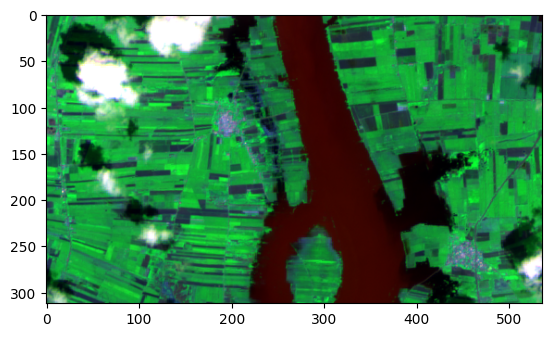

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


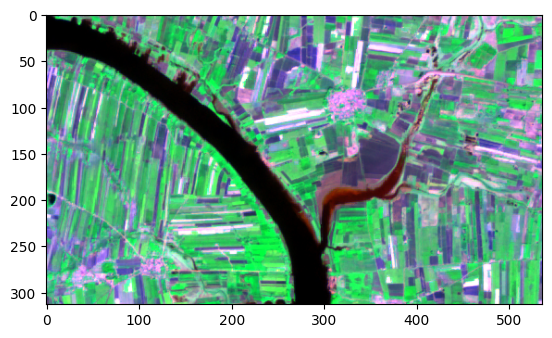

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


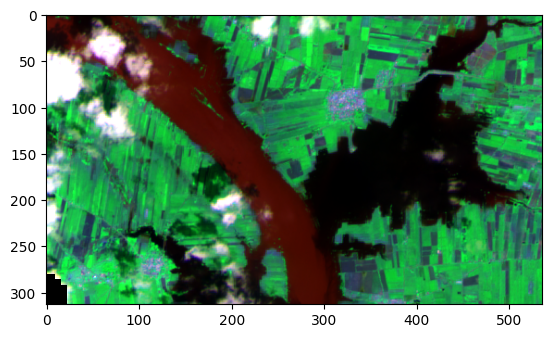

In [7]:
# Visualizing all the images
for img in images:
  plot_image(img)

In [8]:
# Opening the test images
imgP = gdal.Open("./ALL_FLOOD/1_P.tif")
imgA = gdal.Open("./ALL_FLOOD/1_A.tif")

before_img = applyCCC(imgP)
after_img = applyCCC(imgA)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


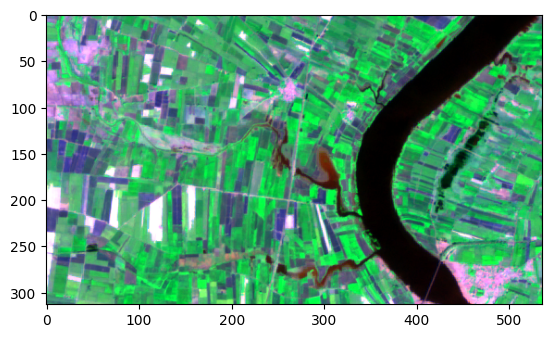

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


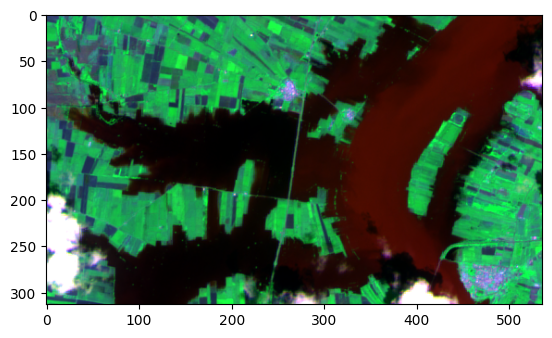

In [9]:
# Visualizing the before and after food images
plot_image(before_img)
plot_image(after_img)

In [10]:
# Reshaping the test images

new_before_shape = (before_img.shape[0] * before_img.shape[1], before_img.shape[2])
X_before = before_img[:, :, :3].reshape(new_before_shape)

new_after_shape = (after_img.shape[0] * after_img.shape[1], after_img.shape[2])
X_after = after_img[:, :, :3].reshape(new_after_shape)

In [11]:
# Running KMeans Algorithm on test before image

kmeans_before_labels = kmeans_model.fit_predict(X_before)
kmeans_before_labels_reshaped = kmeans_before_labels.reshape(before_img[:, :, 0].shape)

In [12]:
# Running KMeans Algorithm on test after image

kmeans_after_labels = kmeans_model.fit_predict(X_after)
kmeans_after_labels_reshaped = kmeans_after_labels.reshape(after_img[:, :, 0].shape)

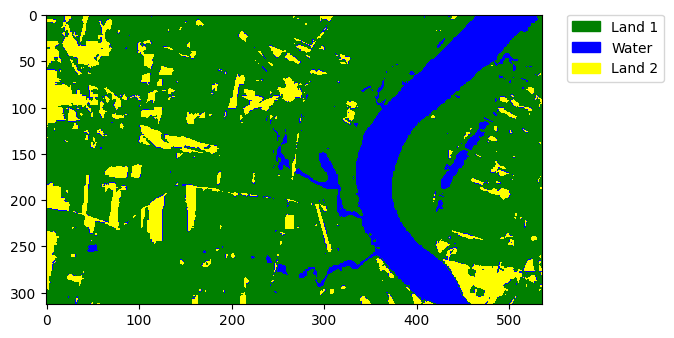

In [19]:
# Visualizing the clusters formed for pre-flood image

import matplotlib.patches as mpatches
import matplotlib.colors as colo

plt.figure()

custom = colo.ListedColormap(["green", "blue", "yellow"])

im_before = plt.imshow(kmeans_before_labels_reshaped, cmap = custom)

values = np.unique(kmeans_before_labels_reshaped.ravel())

# Getting the colors of the values, according to the colormap used by imshow
colors = [im_before.cmap(im_before.norm(value)) for value in values]

# Creating a patch (proxy artist) for every color 
labels = ["Land 1", "Water",  "Land 2"]
patches = [mpatches.Patch(color=colors[i], label=labels[i]) for i in range(len(values)) ]
# Putting those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

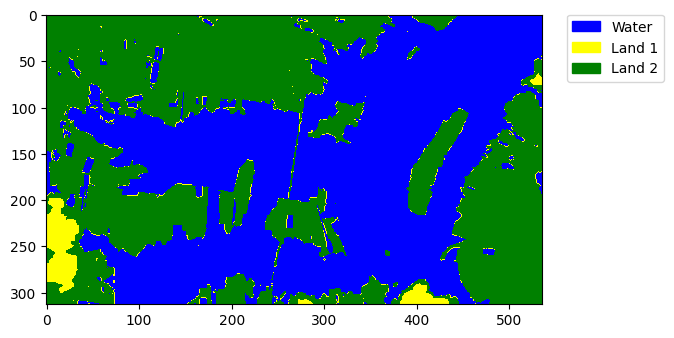

In [20]:
# Visualizing the clusters formed for post-flood image

plt.figure()

custom = colo.ListedColormap(["blue", "yellow", "green"])

im_after = plt.imshow(kmeans_after_labels_reshaped, cmap = custom)

values = np.unique(kmeans_after_labels_reshaped.ravel())

# Getting the colors of the values, according to the colormap used by imshow
colors = [im_after.cmap(im_after.norm(value)) for value in values]

# Creating a patch (proxy artist) for every color 
labels = ["Water", "Land 1", "Land 2"]
patches = [ mpatches.Patch(color=colors[i], label=labels[i]) for i in range(len(values)) ]
# Putting those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [21]:
# Calculating water percentage for before image

arr_before = np.unique(kmeans_before_labels, return_counts=True)
key_before, val_before = arr_before
water_before = val_before[1]/(val_before[0] + val_before[1] + val_before[2]) * 100
print("%.2f" %water_before, "%")

11.97 %


In [22]:
# Calculating water percentage for after image

arr_after = np.unique(kmeans_after_labels, return_counts=True)
key_after, val_after = arr_after
water_after = val_after[0]/(val_after[0] + val_after[1] + val_after[2]) * 100
print("%.2f" %water_after, "%")

52.01 %


In [23]:
# Calculating Flood Increase

flood_increase = water_after - water_before
print("%.2f" %flood_increase, "%")

40.04 %


In [18]:
# Calculating silhouette score for comparision

sklearn.metrics.silhouette_score(X_after, kmeans_after_labels)

0.6681424